In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np

In [2]:
page = requests.get('https://www.spotrac.com/mlb/boston-red-sox/payroll/')
soup = BeautifulSoup(page.content, 'html.parser')

In [3]:
page

<Response [200]>

In [4]:
node = soup.select('.teams')[0]
list(node.children)
[type(i) for i in list(node.children)]

[bs4.element.NavigableString,
 bs4.element.Comment,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Comment,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Comment,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Comment,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Comment,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.T

In [5]:
table = list(node.children)[3]
list(table.children)
# [type(i) for i in list(table.children)]

['\n', <thead>
 <tr>
 <th class="player">Active Players (25)</th>
 <th class="center xs-hide">Age</th>
 <th class="center">Pos.</th>
 <th class="center xs-hide">Status</th>
 <th class="center xs-hide">Waiver Options</th>
 <th class="right xs-hide">Base Salary</th>
 <th class="right xs-hide"><span class="info" title="The prorated portion of the signing bonus allocated to this year's salary cap.">Signing Bonus</span></th>
 <th class="right xs-hide"><span class="info" title="">Incentives</span></th>
 <th class=" right"><span class="info" title="The overall salary cap figure.">Total Salary</span></th>
 <th class="right"><span class="info" title="The overall adjusted salary figure.">Adj. <br/>Salary</span></th>
 <th class="center">Payroll %</th>
 </tr>
 </thead>, '\n', <tbody>
 <tr>
 <td class="player">
 <span style="display:none">Price</span>
 <a href="https://www.spotrac.com/redirect/player/7536/">David Price</a>
 </td>
 <td class=" center small xs-hide"><span class="cap" title="">32</spa

In [6]:
tbody = list(table.children)[3]
list(tbody.children)
[type(i) for i in list(tbody.children)]

[bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.eleme

In [7]:
tr = list(tbody.children)[1]
[type(i) for i in list(tr.children)]
# print(len(list(tr.children)))
# list(tr.children)[11] # Returns salary

[bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString]

In [8]:
span = list(tr.children)[11]
span.get_text()

'$30,000,000'

In [9]:
my_list = []
for i in range(len(list(tbody.children))):
    if i%2==1:
        tr = list(tbody.children)[i]
        salary = list(tr.children)[11]
        string = salary.get_text().replace('$', '')
        string2 = string.replace(',', '')
        string2 = float(string2)
        my_list.append(string2)
print(f"Boston Red Sox - Active Player Salary Total: ${np.sum(my_list)}")
print(f"Boston Red Sox - Active Player Average Salary: ${np.mean(my_list)}")

Boston Red Sox - Active Player Salary Total: $158482000.0
Boston Red Sox - Active Player Average Salary: $6339280.0


In [10]:
# How much does David Price make per pitch?

# How many innings? 9
# How many pitches? ~100/game
# What's his salary? $30,000,000
# How many games does the average pitcher play in? 32 games/season

In [11]:
tr = list(tbody.children)[1]
list(tr.children)[11]

<td class=" right xs-hide "><span class="cap info " title="Base">$30,000,000</span></td>

In [12]:
def pay_per_pitch(pitches, games_played):
    tr = list(tbody.children)[1]
    salary = list(tr.children)[11]
    salary = salary.get_text().replace('$', '')
    salary = salary.replace(',', '')
    salary = float(salary)
    per_pitch = salary / (pitches * games_played)
    return f"David Price gets paid ${per_pitch} per pitch **Rolls Eyes**"

In [13]:
pay_per_pitch(100, 32)

'David Price gets paid $9375.0 per pitch **Rolls Eyes**'

In [17]:
import matplotlib.pyplot as plt

In [20]:
year = [2010, 2011, 2012, 2013, 2014, 2015]
salary = [15000000, 20000000, 18000000, 26000000, 22000000, 30000000]

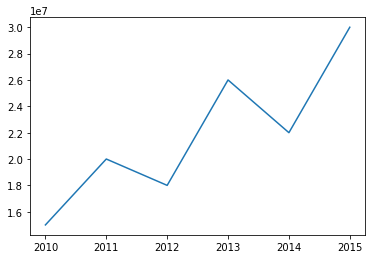

In [25]:
plt.plot(year, salary)
plt.show()

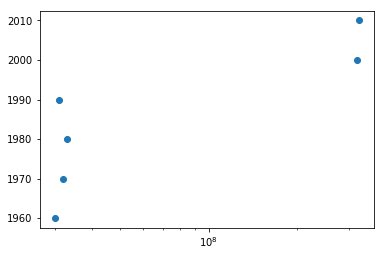

In [30]:
pop = [30000000, 32000000, 33000000, 31000000, 320000000, 325000000]
year = [1960, 1970, 1980, 1990, 2000, 2010]

plt.scatter(pop, year)
plt.xscale('log')
plt.show()

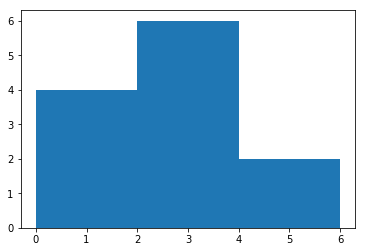

In [38]:
values = [0,0.6,1.4,1.6,2.2,2.5,2.6,3.2,3.5,3.9,4.2,6] 

plt.hist(values, bins=3)
plt.show()

In [98]:
import pandas as pd
data = pd.read_csv('data.csv', index_col=1)
data

,Unnamed: 0,priceLabel,name,brandId,brandName,imageLink,desc,vendor,print,material,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
id,,,,,,,,,,,,,,,,,,,
399795110,0,119.83,Burberry London checked silk tie,870,Burberry,http://bim.shopstyle.com/pim/3c/27/3c27ee2884a...,Nude silk tie from Burberry London featuring a...,farfetch.com,_print,_silk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12822215,1,59.50,BB1 Repp Slim Tie,3415,Brooks Brothers,http://bim.shopstyle.com/pim/6b/63/6b63cc48386...,"Expertly woven in England, this collection is ...",Brooks Brothers,_striped,_silk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369523836,2,119.83,Burberry London check woven tie,870,Burberry,http://bim.shopstyle.com/pim/51/d0/51d0e2b9608...,Beige silk tie from Burberry London featuring ...,farfetch.com,unknown,_silk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436980493,3,90.20,Salvatore Ferragamo Vintage patterned tie,1948,Salvatore Ferragamo,http://bim.shopstyle.com/pim/d2/b6/d2b66a7e72d...,Azure blue silk patterned tie from Salvatore F...,farfetch.com,_print,_silk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
462309856,4,139.30,Salvatore Ferragamo Gancio print tie,1948,Salvatore Ferragamo,http://bim.shopstyle.com/pim/4c/94/4c943cea044...,Blue silk Gancio print tie from Salvatore Ferr...,farfetch.com,_print,_silk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445814180,5,117.87,Burberry London micro dot tie,870,Burberry,http://bim.shopstyle.com/pim/22/67/2267bfa7a6d...,Mid blue silk micro dot tie from Burberry Lond...,farfetch.com,unknown,_silk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461795606,6,190.00,Salvatore Ferragamo Dog & Shoe-Print Neck Tie,1948,Salvatore Ferragamo,http://bim.shopstyle.com/pim/41/24/4124e4d275d...,Salvatore Ferragamo orange-red/multicolor dog ...,Barneys New York,_print,_silk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461954865,7,95.00,Hermès Tie,1274,Hermes,http://bim.shopstyle.com/pim/5e/df/5edf8d8364e...,Men's dark pink,tan and multicolor Hermès silk necktie with f...,TheRealReal,unknown,_silk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458506705,8,133.94,Burberry London 'Nova check' pointed tip tie,870,Burberry,http://bim.shopstyle.com/pim/ff/8c/ff8c2516e2d...,Beige silk 'Nova check' pointed tip tie from B...,farfetch.com,unknown,_silk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# Calculate sum of the price of all ties in the store
np.sum(data['priceLabel'])

702600.69